# Alcuni dati su treni e pendolari in Lombardia
Alcuni punti chiave da sviluppare sono:
- **Numero di pendolari** e **direzione degli spostamenti** (immagino verso Milano);
- **Puntualità** dei trasporti;
- **Frequenza** delle corse;
- **Costo medio** per biglietto e abbonamento;
- **Soddisfazione** dei viaggiatori (se trovo il dato, ma non credo sia facile. Magari si trova qualche articolo o lamentela);
- **Affidabilità** dei viaggi, ovvero numero di cancellazioni o ritardi superiori ai 15 minuti.

In [31]:
import pandas as pd

file_path_lombardia = 'dataset/datiTreniLombardia.csv'
data_lombardia = pd.read_csv(file_path_lombardia, sep=',', decimal='.')

data_lombardia.head()


,Campagna,Codice stazione,Codice aziendale,Reg,Prov,Stazione,Cod Istat,Comune,Linea fisica,Saliti24H,...,Saliti_RE,Corse_S,Corse_R,Corse_RE,Tipo giorno,Anno,Calendario,Location,POINT_X,POINT_Y
0,c_maggio2024,-,-,EM,-,-,-,-,-,1360,...,0,0,134,0,Feriale,2024,invernale (mag),0,0.000000,0.00000
1,c_maggio2024,-,-,PI,-,-,-,-,-,4330,...,2900,0,217,84,Feriale,2024,invernale (mag),0,0.000000,0.00000
2,c_maggio2024,-,-,VE,-,-,-,-,-,6640,...,6640,0,0,33,Feriale,2024,invernale (mag),0,0.000000,0.00000
3,c_maggio2024,-,-,ZZ,-,-,-,-,-,1320,...,0,44,0,0,Feriale,2024,invernale (mag),0,0.000000,0.00000
4,c_maggio2024,146,S01416,LO,LC,ABBADIA LARIANA,97001,Abbadia Lariana,TIRANO-MILANO Lc-So,190,...,30,0,26,1,Feriale,2024,invernale (mag),POINT (9.335204987 45.895939932),9.335205,45.89594


In [32]:
data_lo = data_lombardia[data_lombardia['Reg'] == 'LO']

grouped_data_lo = data_lo.groupby('Prov')['Saliti24H'].sum().reset_index()

print(grouped_data_lo)

   Prov  Saliti24H
0    BG      33780
1    BS      33350
2    CO      36740
3    CR       7830
4    LC      30800
5    LO      11890
6    MI     432990
7    MN       1000
8    PV      26420
9    SO       5930
10   VA      81750


   Prov  Saliti24H
6    MI     432990
10   VA      81750
2    CO      36740
0    BG      33780
1    BS      33350
4    LC      30800
8    PV      26420
5    LO      11890
3    CR       7830
9    SO       5930
7    MN       1000


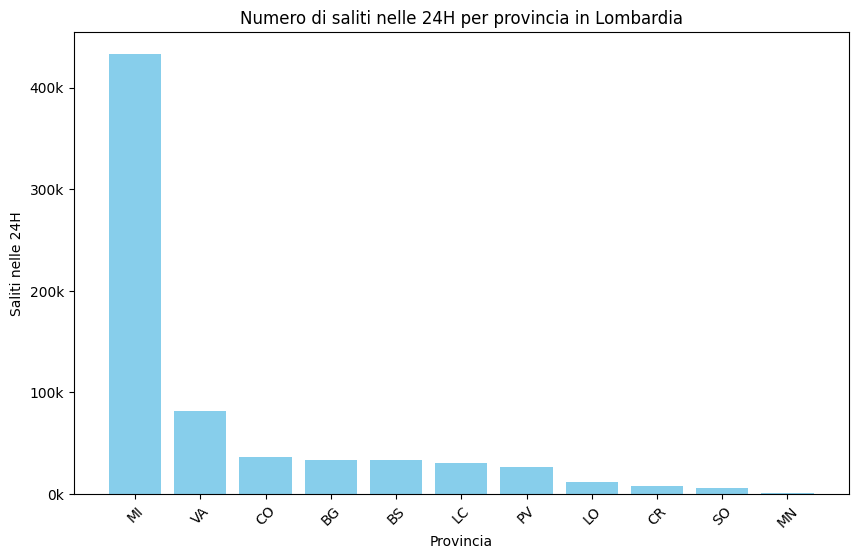

In [33]:
grouped_data_lo_sorted = grouped_data_lo.sort_values(by='Saliti24H', ascending=False)

print(grouped_data_lo_sorted)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(grouped_data_lo_sorted['Prov'], grouped_data_lo_sorted['Saliti24H'], color='skyblue')
plt.xlabel('Provincia')
plt.ylabel('Saliti nelle 24H')
plt.title('Numero di saliti nelle 24H per provincia in Lombardia')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))
plt.show()


In [34]:
grouped_data_lo_province = data_lo.groupby('Prov')[['Saliti24H', 'Discesi7-9']].sum().reset_index()

grouped_data_lo_province['Saliti_per_ora'] = grouped_data_lo_province['Saliti24H'] / 24
grouped_data_lo_province['Discesi_per_ora'] = grouped_data_lo_province['Discesi7-9'] / 3  

grouped_data_lo_province_day_type = data_lo.groupby(['Prov', 'Tipo giorno'])[['Saliti24H', 'Discesi7-9']].sum().reset_index()

grouped_data_lo_province_day_type['Saliti_per_ora'] = grouped_data_lo_province_day_type['Saliti24H'] / 24
grouped_data_lo_province_day_type['Discesi_per_ora'] = grouped_data_lo_province_day_type['Discesi7-9'] / 3 

print(grouped_data_lo_province_day_type)

   Prov Tipo giorno  Saliti24H  Discesi7-9  Saliti_per_ora  Discesi_per_ora
0    BG     Feriale      33780        6090     1407.500000      2030.000000
1    BS     Feriale      33350        6020     1389.583333      2006.666667
2    CO     Feriale      36740        5940     1530.833333      1980.000000
3    CR     Feriale       7830        1640      326.250000       546.666667
4    LC     Feriale      30800        5290     1283.333333      1763.333333
5    LO     Feriale      11890        2000      495.416667       666.666667
6    MI     Feriale     432990      114240    18041.250000     38080.000000
7    MN     Feriale       1000         140       41.666667        46.666667
8    PV     Feriale      26420        5090     1100.833333      1696.666667
9    SO     Feriale       5930        1660      247.083333       553.333333
10   VA     Feriale      81750       15000     3406.250000      5000.000000


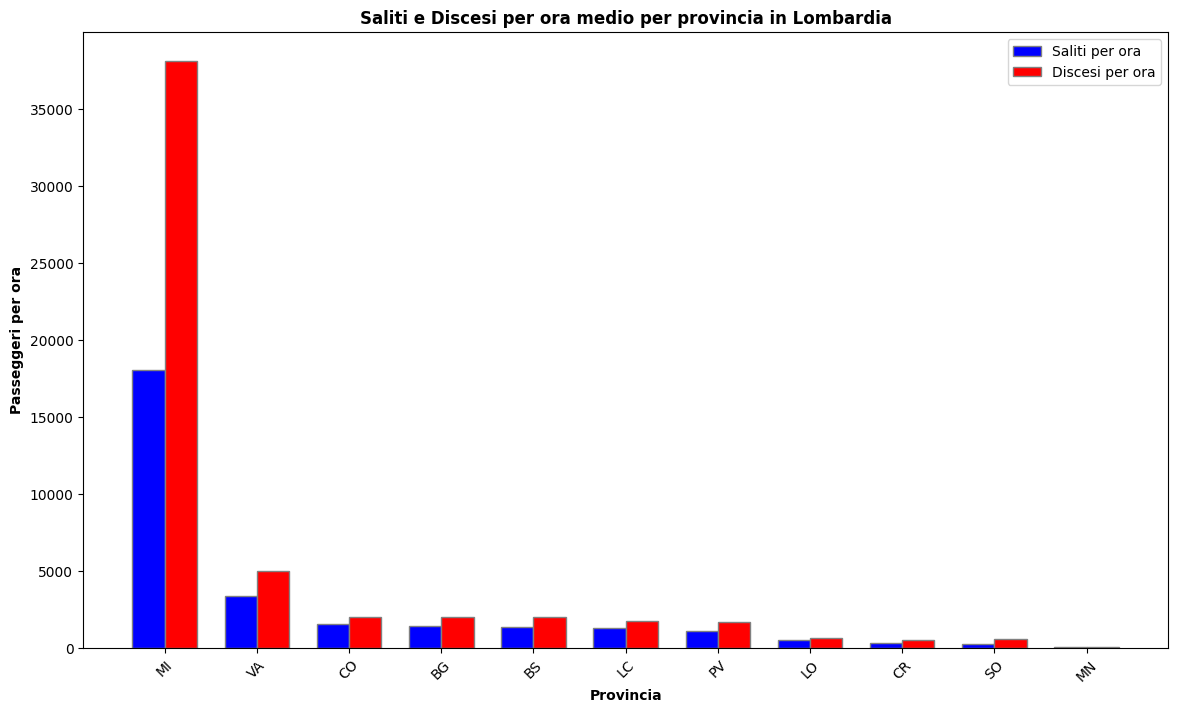

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

grouped_data_lo_province_sorted = grouped_data_lo_province.sort_values(by='Saliti_per_ora', ascending=False)

bar_width = 0.35

r1 = np.arange(len(grouped_data_lo_province_sorted))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(14, 8))
plt.bar(r1, grouped_data_lo_province_sorted['Saliti_per_ora'], color='b', width=bar_width, edgecolor='grey', label='Saliti per ora')
plt.bar(r2, grouped_data_lo_province_sorted['Discesi_per_ora'], color='r', width=bar_width, edgecolor='grey', label='Discesi per ora')

plt.xlabel('Provincia', fontweight='bold')
plt.ylabel('Passeggeri per ora', fontweight='bold')
plt.title('Saliti e Discesi per ora medio per provincia in Lombardia', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(grouped_data_lo_province_sorted))], grouped_data_lo_province_sorted['Prov'], rotation=45)

plt.legend()
plt.show()

## Linea con più passeggeri

In [41]:
file_path_ritardi = 'dataset/ritardiItalia.csv'
data_ritardi = pd.read_csv(file_path_ritardi, sep=',', decimal='.')

data_ritardi.head()

,train_id,train_class,train_number,train_departure_stop_name,train_arrival_stop_name,avg_arrival_delay,median_arrival_delay,perc_3m_delay,perc_5m_delay,perc_10m_delay,count_dates_train,count_stops_train,first_date,last_date,departure_time,arrival_time
0,FR9527MILANO CENTRALENAPOLI CENTRALE,FR,9527,MILANO CENTRALE,NAPOLI CENTRALE,17.491758,11.125000,0.714286,0.571429,0.410714,14,8,2023-08-07,2023-10-23,10:15,15:12
1,REG10021MI.P.GENOVAMORTARA,REG,10021,MI.P.GENOVA,MORTARA,5.922711,2.571429,0.486111,0.354663,0.205853,288,7,2023-01-02,2023-12-29,06:42,07:35
2,REG1139M N CADORNACOMO NORD LAGO,REG,1139,M N CADORNA,COMO NORD LAGO,0.236287,0.000000,0.037975,0.012658,0.000000,237,1,2023-01-02,2023-12-23,12:32,12:32
3,REG11818AOSTAIVREA,REG,11818,AOSTA,IVREA,2.311655,1.625000,0.382601,0.178632,0.031672,296,8,2023-01-02,2023-12-30,07:04,08:22
4,REG1224NOVARA NORDM N CADORNA,REG,1224,NOVARA NORD,M N CADORNA,0.811966,0.000000,0.113248,0.068376,0.029915,234,4,2023-01-02,2023-12-23,08:08,08:22


In [48]:
# Merge dei due dataset sulle fermate in comune
fermate_comuni = pd.merge(data_lombardia, data_ritardi, left_on='Stazione', right_on='train_arrival_stop_name')

# Aggrega i dati secondo la stazione mostrando i dati medi
fermate_comuni_mean = fermate_comuni.groupby('Stazione').agg({
	'Saliti24H': 'mean',
	'avg_arrival_delay': 'mean'
}).reset_index()

# Mostra le fermate in comune con i dati medi
print(fermate_comuni_mean[['Stazione', 'Saliti24H', 'avg_arrival_delay']])


                  Stazione  Saliti24H  avg_arrival_delay
0                    ARONA     1320.0           3.613431
1                  BERGAMO    10170.0           2.923070
2                   BESANA      560.0           1.877882
3                  BRESCIA    11880.0           2.973620
4            BUSTO ARSIZIO     4930.0           2.183451
5           CARNATE USMATE     4490.0           3.765856
6                  CHIASSO     5640.0           2.380999
7                CHIAVENNA      500.0           2.210379
8                  CODOGNO     2280.0           4.367855
9                   COLICO     1550.0           2.096147
10           COSTA MASNAGA      360.0           1.383788
11                 CREMONA     2800.0           3.969900
12               GALLARATE     7530.0           3.957719
13                   LECCO     9950.0           3.369376
14                  LIERNA      290.0           2.776091
15                    LODI     5710.0           1.551224
16                   LUINO     

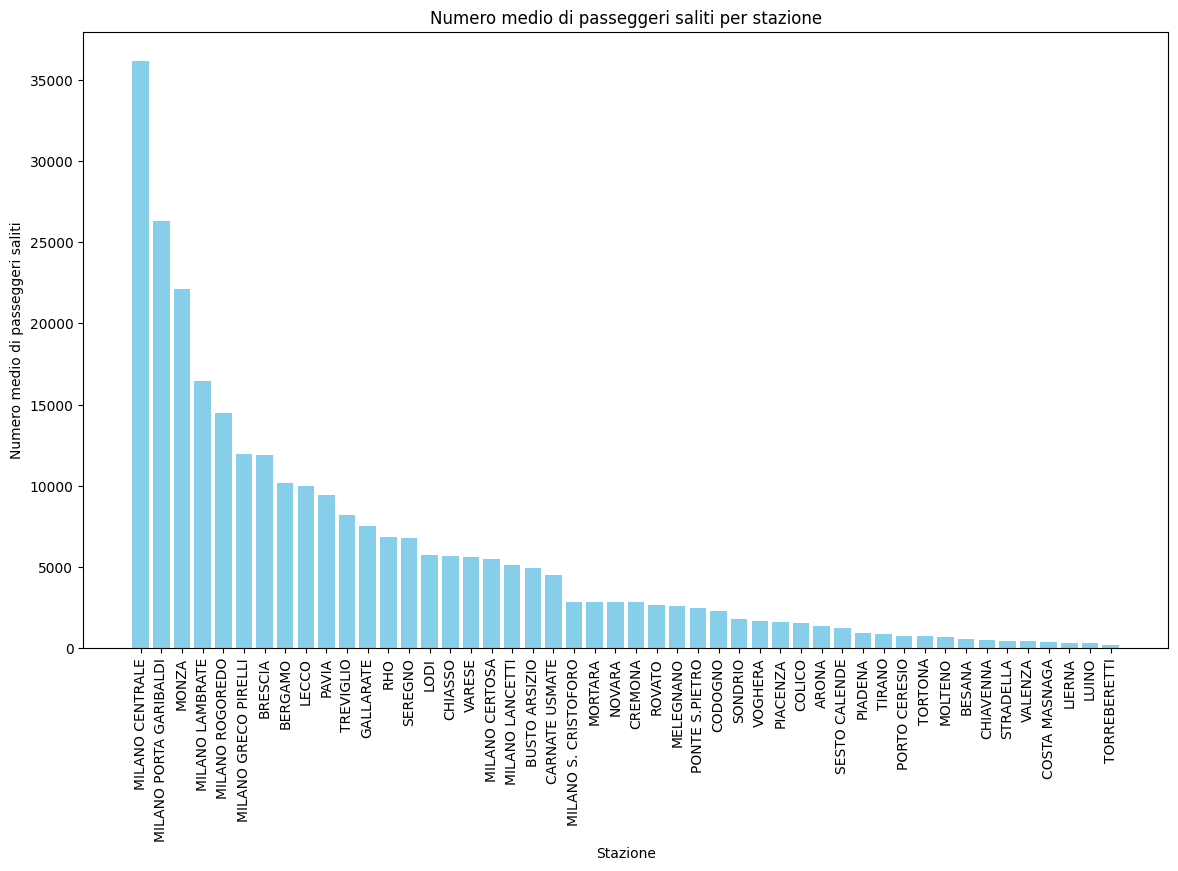

/var/folders/l_/g9z6nmyj7zq9g1y79tdg1q380000gn/T/ipykernel_15351/1167191994.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(fermate_comuni_mean_sorted['Stazione'], rotation=90)


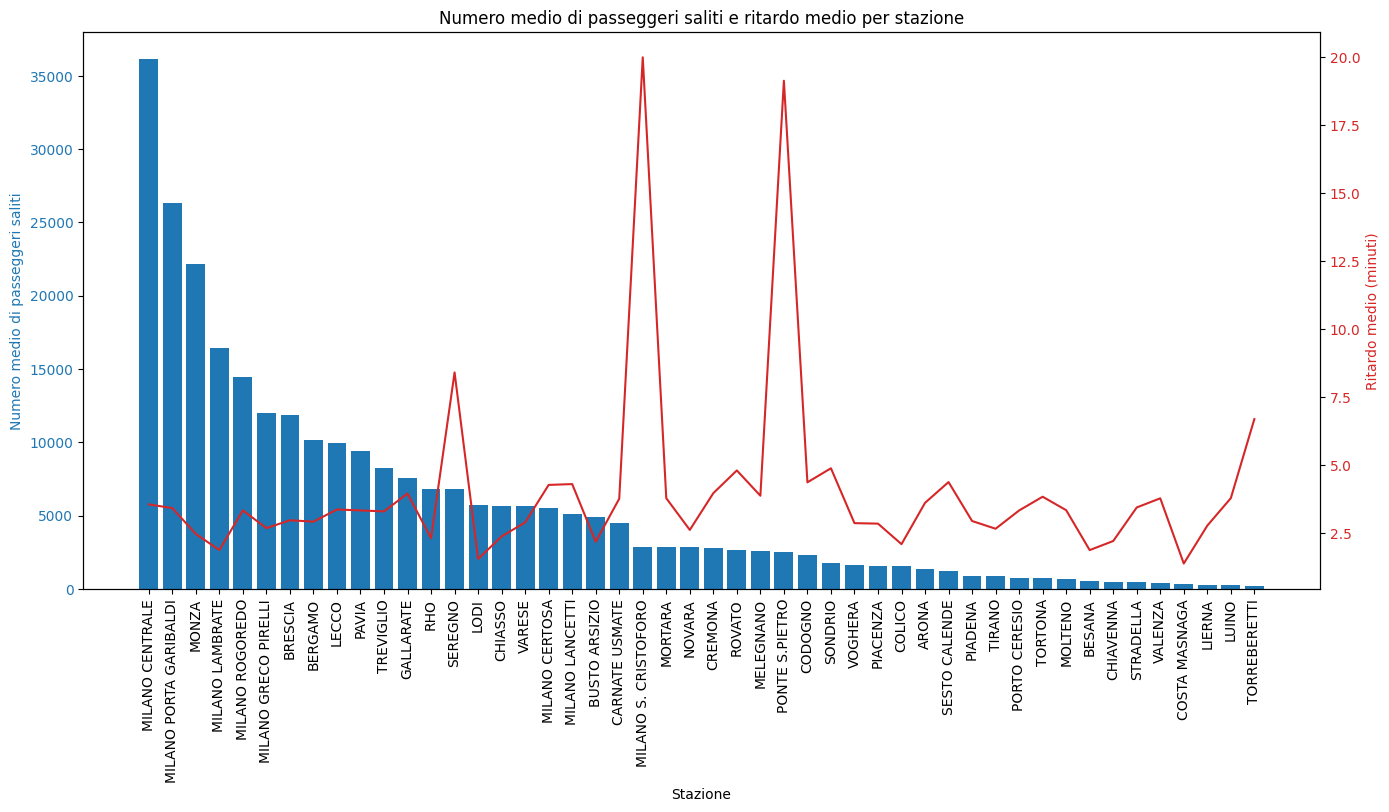

In [51]:
import matplotlib.pyplot as plt

# Ordinare i dati per numero di passeggeri saliti
fermate_comuni_mean_sorted = fermate_comuni_mean.sort_values(by='Saliti24H', ascending=False)

# Creare il grafico a barre
plt.figure(figsize=(14, 8))
plt.bar(fermate_comuni_mean_sorted['Stazione'], fermate_comuni_mean_sorted['Saliti24H'], color='skyblue')
plt.xlabel('Stazione')
plt.ylabel('Numero medio di passeggeri saliti')
plt.title('Numero medio di passeggeri saliti per stazione')
plt.xticks(rotation=90)
plt.show()
# Creare il grafico a barre con ritardo medio
fig, ax1 = plt.subplots(figsize=(14, 8))

color = 'tab:blue'
ax1.set_xlabel('Stazione')
ax1.set_ylabel('Numero medio di passeggeri saliti', color=color)
ax1.bar(fermate_comuni_mean_sorted['Stazione'], fermate_comuni_mean_sorted['Saliti24H'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(fermate_comuni_mean_sorted['Stazione'], rotation=90)

ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Ritardo medio (minuti)', color=color)
ax2.plot(fermate_comuni_mean_sorted['Stazione'], fermate_comuni_mean_sorted['avg_arrival_delay'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title('Numero medio di passeggeri saliti e ritardo medio per stazione')
plt.show()

In [46]:
linea_con_piu_passeggeri = data_lombardia.groupby('Linea fisica')['Saliti24H'].sum().reset_index()
linea_con_piu_passeggeri_sorted = linea_con_piu_passeggeri.sort_values(by='Saliti24H', ascending=False)

print(linea_con_piu_passeggeri_sorted.head(1))

                 Linea fisica  Saliti24H
25  Milano Nord Cadorna - Sar      96030
